In [ ]:
import sklearn
#from sklearn import datasets		# To Get iris dataset
from sklearn import svm    	
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.svm import SVR
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Chapter Two 
from scipy.stats import randint as sp_randint
from sklearn.decomposition import PCA
from pathlib import Path
import pandas as pd
import seaborn as sns
from matplotlib import style
from matplotlib import pyplot
from matplotlib import pyplot as plt
style.use("ggplot")
import statsmodels.api as sm
from statsmodels import regression, stats
import statsmodels.stats.diagnostic as smd
from statsmodels import regression
from statsmodels.tsa.stattools import coint, adfuller
from chart_studio.plotly import plotly

import sys
sys.path.append('/Users/v/Documents/Documents - Vanessa’s MacBook/GitHub/sc-applied-quantitative-finance/Assignment')
#from backtester.dataSource.yahoo_data_source import YahooStockDataSource
from datetime import datetime

# We install aquan toolbox (11/7/2020) and we import it using backtester
#import backtester

import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.manifold import TSNE
import matplotlib.cm as cm

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

# Deep Learning
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras import regularizers
from keras.optimizers import SGD
from keras.utils import to_categorical

from utils import data_string_to_float, status_calc_out, status_calc_under
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# Evaluation
from evaluation import EvaluationClass

import torch
from LR_pytorch import LogisticRegression_pytorch
from LR_pytorch import comp_accuracy
""" Tensorflow backend warning suppression"""

# for Stacking classifier or regression
from vecstack import stacking


In [1]:
import yfinance as yf
from pandas_datareader import data as pdr
import numpy as np
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like # remove once updated pandas-datareader issue is fixed
# https://github.com/pydata/pandas-datareader/issues/534
import pandas_datareader.data as web
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rcParams['figure.figsize'] = [12, 8]
import seaborn as sns

### Download data from Yahoo

In [2]:
# try Yahoo using a new API code yfinance, download dataframe using pandas_datareader   
#prices_indx = pdr.get_data_yahoo(['SPY', '^GSPC','^DJI','^IXIC','^RUT', '^TNX'], start ='2010-01-01',end=None)
prices_yf = pdr.get_data_yahoo(['IBM','AAPL','CSCO','MSFT','INTC','WMT','SHLDQ','GE','MMM','AMZN','XOM'], start ='2012-01-01',end='2019-10-01')

#print(prices_yf.sort_index().head())
prices_yf

Attributes   Adj Close                                               \
Symbols            IBM       AAPL       CSCO        MSFT       INTC   
Date                                                                  
2012-01-03  134.881241  12.650659  14.136563   21.799267  18.647131   
2012-01-04  134.330948  12.718646  14.409732   22.312283  19.080259   
2012-01-05  133.693863  12.859850  14.356619   22.540291  19.300613   
2012-01-06  132.158981  12.994284  14.303503   22.890448  19.186634   
2012-01-09  131.471176  12.973674  14.394560   22.589146  19.353809   
...                ...        ...        ...         ...        ...   
2019-09-25  132.665604  54.538898  47.218258  137.115707  49.210960   
2019-09-26  133.027023  54.257603  46.475861  137.292786  49.114510   
2019-09-27  132.739746  53.993587  46.485378  135.511932  48.979469   
2019-09-30  134.759933  55.264339  47.027901  136.791000  49.702877   
2019-10-01  133.128983  55.417320  45.438416  134.862610  48.960182   

Attributes                                                             ...  \
Symbols            WMT      SHLDQ         GE         MMM         AMZN  ...   
Date                                                                   ...   
2012-01-03   48.455952  23.722122  13.900859   64.857773   179.029999  ...   
2012-01-04   47.957977  23.246624  14.052279   65.393768   177.509995  ...   
2012-01-05   47.725063  22.733385  14.044711   65.098595   177.610001  ...   
2012-01-06   47.387714  22.039007  14.120420   64.764534   182.610001  ...   
2012-01-09   47.532295  22.408838  14.279417   65.152969   178.559998  ...   
...                ...        ...        ...         ...          ...  ...   
2019-09-25  115.522148   0.270000   9.098786  155.474319  1768.329956  ...   
2019-09-26  115.356384   0.280000   8.959722  155.313171  1739.839966  ...   
2019-09-27  115.502655   0.280000   8.979589  155.976776  1725.449951  ...   
2019-09-30  115.726929   0.260000   8.880256  155.853531  1735.910034  ...   
2019-10-01  114.917580   0.270000   8.552462  150.146484  1735.650024  ...   

Attributes       Volume                                                  \
Symbols            AAPL        CSCO        MSFT        INTC         WMT   
Date                                                                      
2012-01-03  302220800.0  41236600.0  64731500.0  44845600.0  12668800.0   
2012-01-04  260022000.0  52927700.0  80516100.0  47504000.0   9593300.0   
2012-01-05  271269600.0  37865300.0  56081400.0  49490600.0  12768200.0   
2012-01-06  318292800.0  27796900.0  99455500.0  36343500.0   8069400.0   
2012-01-09  394024400.0  37811500.0  59706800.0  47478600.0   6679300.0   
...                 ...         ...         ...         ...         ...   
2019-09-25   87613600.0  14013500.0  21382000.0  19486700.0   4613600.0   
2019-09-26   75334000.0  20172900.0  17456600.0  11351800.0   3986900.0   
2019-09-27  101408000.0  16065300.0  22477700.0  14845700.0   3434700.0   
2019-09-30  103909600.0  14903600.0  17280900.0  13652100.0   3401400.0   
2019-10-01  139223200.0  24185600.0  21466600.0  18413100.0   3729300.0   

Attributes                                                           
Symbols         SHLDQ          GE        MMM       AMZN         XOM  
Date                                                                 
2012-01-03  3166700.0  61054864.0  3380100.0  5110800.0  20906800.0  
2012-01-04  2536301.0  44464888.0  3007400.0  4205200.0  16130900.0  
2012-01-05  4346279.0  47651968.0  3116400.0  3809100.0  17452800.0  
2012-01-06  2316099.0  53112176.0  2839200.0  7008400.0  15942100.0  
2012-01-09  2064363.0  48866896.0  2796600.0  5056900.0  11664200.0  
...               ...         ...        ...        ...         ...  
2019-09-25   185800.0  43859400.0  2758200.0  3493200.0   8035200.0  
2019-09-26   295400.0  37229800.0  2763300.0  3536800.0   8420200.0  
2019-09-27   133900.0  30511000.0  2870300.0  3907200.0   8224000.0  
2019-09-30    68900.0

### Question 1 - Extract the Adj Close prices and define them in a new variable

In [3]:
prices_yf_adj_close=prices_yf.iloc[:,0:11]
prices_yf_adj_close

Attributes   Adj Close                                               \
Symbols            IBM       AAPL       CSCO        MSFT       INTC   
Date                                                                  
2012-01-03  134.881241  12.650659  14.136563   21.799267  18.647131   
2012-01-04  134.330948  12.718646  14.409732   22.312283  19.080259   
2012-01-05  133.693863  12.859850  14.356619   22.540291  19.300613   
2012-01-06  132.158981  12.994284  14.303503   22.890448  19.186634   
2012-01-09  131.471176  12.973674  14.394560   22.589146  19.353809   
...                ...        ...        ...         ...        ...   
2019-09-25  132.665604  54.538898  47.218258  137.115707  49.210960   
2019-09-26  133.027023  54.257603  46.475861  137.292786  49.114510   
2019-09-27  132.739746  53.993587  46.485378  135.511932  48.979469   
2019-09-30  134.759933  55.264339  47.027901  136.791000  49.702877   
2019-10-01  133.128983  55.417320  45.438416  134.862610  48.960182   

Attributes                                                             \
Symbols            WMT      SHLDQ         GE         MMM         AMZN   
Date                                                                    
2012-01-03   48.455952  23.722122  13.900859   64.857773   179.029999   
2012-01-04   47.957977  23.246624  14.052279   65.393768   177.509995   
2012-01-05   47.725063  22.733385  14.044711   65.098595   177.610001   
2012-01-06   47.387714  22.039007  14.120420   64.764534   182.610001   
2012-01-09   47.532295  22.408838  14.279417   65.152969   178.559998   
...                ...        ...        ...         ...          ...   
2019-09-25  115.522148   0.270000   9.098786  155.474319  1768.329956   
2019-09-26  115.356384   0.280000   8.959722  155.313171  1739.839966   
2019-09-27  115.502655   0.280000   8.979589  155.976776  1725.449951   
2019-09-30  115.726929   0.260000   8.880256  155.853531  1735.910034   
2019-10-01  114.917580   0.270000   8.552462  150.146484  1735.650024   

Attributes             
Symbols           XOM  
Date                   
2012-01-03  59.593678  
2012-01-04  59.607536  
2012-01-05  59.427364  
2012-01-06  58.983871  
2012-01-09  59.247211  
...               ...  
2019-09-25  64.195686  
2019-09-26  63.853790  
2019-09-27  64.312653  
2019-09-30  63.529888  
2019-10-01  62.036327  

[1949 rows x 11 columns]

### Features Data

In [4]:
# Get the factor data from the Parsing process.
#dataset, and drop any rows with missing values
data_df = pd.read_csv("keystats.csv", index_col="Date")
data_df.dropna(axis=0, how="any", inplace=True)

features = data_df.columns[6:]
data_features = data_df[features]
X = data_df[features].values

In [5]:
from sklearn.preprocessing import MinMaxScaler #Normalization

In [6]:
# Getting rid of the NaN values.
#data_features.dropna(how='any', inplace=True)

scaler = MinMaxScaler()

# Normalizing features
data_features_N = pd.DataFrame(scaler.fit_transform(data_features),
            columns=data_features.columns, index=data_features.index)

features_tickers = data_df["Ticker"].values

In [7]:
data_features_N.head()

,Market Cap,Enterprise Value,Trailing P/E,Forward P/E,PEG Ratio,Price/Sales,Price/Book,Enterprise Value/Revenue,Enterprise Value/EBITDA,Profit Margin,...,200-Day Moving Average,Avg Vol (3 month),Shares Outstanding,Float,% Held by Insiders,% Held by Institutions,Shares Short (as of,Short Ratio,Short % of Float,Shares Short (prior month)
Date,,,,,,,,,,,,,,,,,,,,,
2007-07-11,0.011719,0.046174,0.001598,0.066410,0.334783,0.052565,0.002285,0.110871,0.130023,0.079482,...,0.044308,0.006841,0.012381,0.011354,0.147324,0.049865,0.011686,0.133117,0.077263,0.011231
2013-04-26,0.010039,0.045576,0.001537,0.059513,0.335036,0.038716,0.001899,0.098826,0.123194,0.061857,...,0.048338,0.003294,0.008970,0.008217,0.135330,0.057507,0.011917,0.256494,0.119205,0.014658
2006-10-23,0.012260,0.046489,0.001730,0.062069,0.334540,0.057602,0.002393,0.116121,0.135499,0.081641,...,0.044557,0.004928,0.012562,0.011202,0.120275,0.049325,0.009118,0.178571,0.059603,0.010556
2006-09-05,0.011256,0.045711,0.001638,0.057404,0.334394,0.054454,0.002193,0.111489,0.129948,0.082160,...,0.045067,0.005595,0.012571,0.011211,0.143519,0.049479,0.009760,0.123377,0.064018,0.009230
2008-11-02,0.162246,0.181391,0.001096,0.038174,0.334988,0.026125,0.001212,0.091723,0.089149,0.055205,...,0.038595,0.140806,0.265518,0.264970,0.000165,0.048939,0.071573,0.032468,0.017660,0.079567


### PCA Stock Tickers

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# Generate the train set and test set by randomly splitting the dataset
X_train, X_test = train_test_split(data_features_N,  test_size=0.2)

In [10]:
X = data_features_N.values

In [11]:
# PCA

from sklearn.decomposition import PCA
pca = PCA(n_components=2) # Choose 2 components is to plot the scatterplot
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [12]:
pca.explained_variance_ratio_ # Only can explain about 55% of data


array([0.42812892, 0.12979814])

In [13]:
principalDf

,principal component 1,principal component 2
0,-0.236636,-0.049929
1,-0.242101,-0.103327
2,-0.240199,-0.041028
3,-0.239032,-0.039207
4,0.525073,-0.083405
...,...,...
3379,-0.221738,0.293595
3380,-0.209676,0.273089
3381,-0.221331,0.186083
3382,-0.219276,0.137067


In [14]:
len(set(features_tickers)) #401 unique tickers

401

In [15]:
principalDf['Ticker']=features_tickers

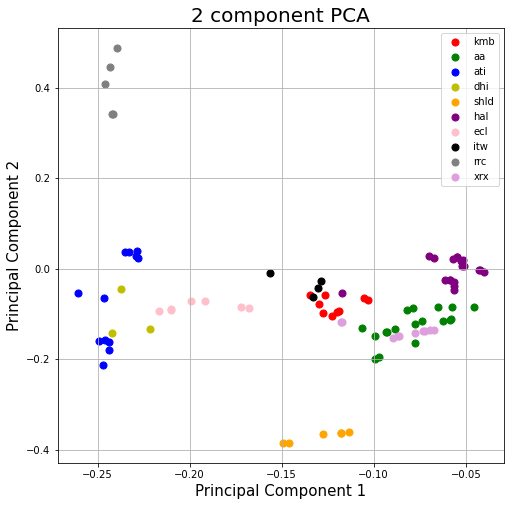

In [16]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = set(features_tickers) # Tickers
colors = ['r', 'g', 'b', 'y', 'orange', 'purple', 'pink', 'black', 'grey','plum']
for ticker, color in zip(targets,colors):
    indicesToKeep = principalDf['Ticker'] == ticker
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

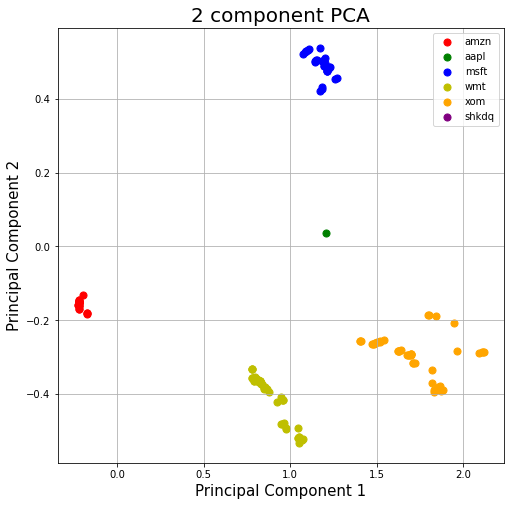

In [17]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['amzn','aapl', 'msft','wmt','xom','shkdq']
colors = ['r', 'g', 'b','y','orange','purple']
for ticker, color in zip(targets,colors):
    indicesToKeep = principalDf['Ticker'] == ticker
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [18]:
pd.concat([principalDf,data_features_N.reset_index()],axis=1).corr().head()

,principal component 1,principal component 2,Market Cap,Enterprise Value,Trailing P/E,Forward P/E,PEG Ratio,Price/Sales,Price/Book,Enterprise Value/Revenue,...,200-Day Moving Average,Avg Vol (3 month),Shares Outstanding,Float,% Held by Insiders,% Held by Institutions,Shares Short (as of,Short Ratio,Short % of Float,Shares Short (prior month)
principal component 1,1.000000e+00,5.208002e-17,0.942356,0.920233,-0.033736,-0.166856,-0.014629,-0.094122,-0.008367,-0.087342,...,0.009766,0.660671,0.890100,0.881095,-0.047209,-0.214581,0.455836,-0.248496,-0.293843,0.452516
principal component 2,5.208002e-17,1.000000e+00,0.024606,0.008004,0.014500,0.112027,0.005213,0.715580,0.031811,0.725100,...,0.180141,0.249351,0.186585,0.198816,-0.086391,0.023564,0.162985,-0.070225,-0.014475,0.162910
Market Cap,9.423555e-01,2.460572e-02,1.000000,0.912411,-0.023602,-0.106424,-0.013900,-0.012383,0.016621,-0.021309,...,0.159742,0.474265,0.775953,0.770448,-0.048974,-0.204799,0.307998,-0.224427,-0.287380,0.309435
Enterprise Value,9.202332e-01,8.004181e-03,0.912411,1.000000,-0.023011,-0.102036,-0.011546,-0.043265,0.010660,-0.007128,...,0.085855,0.517055,0.804614,0.807388,-0.051751,-0.198003,0.322986,-0.202814,-0.258818,0.318758
Trailing P/E,-3.373611e-02,1.450029e-02,-0.023602,-0.023011,1.000000,0.177255,0.002560,0.123376,0.011923,0.110439,...,-0.004061,-0.012800,-0.020515,-0.021657,0.027824,-0.000359,-0.009417,0.065837,0.044814,-0.009644


<AxesSubplot:>

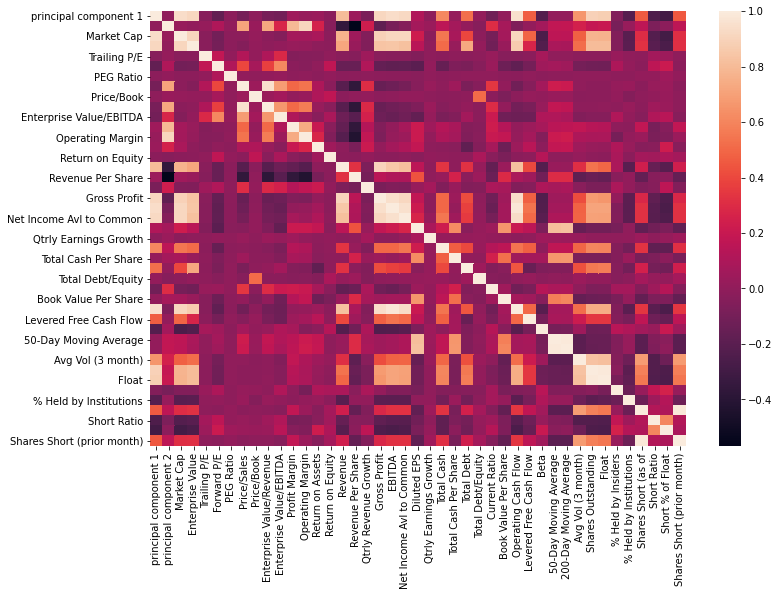

In [19]:
sns.heatmap(pd.concat([principalDf,data_features_N.reset_index()],axis=1).corr())

In [20]:
corr = pd.concat([principalDf,data_features_N.reset_index()],axis=1).corr()

In [21]:
corr.iloc[0].sort_values(ascending = False).head(10) # The Principal component 1's correlations of the features

principal component 1       1.000000
Operating Cash Flow         0.951479
Market Cap                  0.942356
EBITDA                      0.941090
Net Income Avl to Common    0.925486
Enterprise Value            0.920233
Gross Profit                0.919556
Shares Outstanding          0.890100
Float                       0.881095
Revenue                     0.805961
Name: principal component 1, dtype: float64

In [22]:
corr.iloc[1].sort_values(ascending = False).head(4) # The Principal component 2's correlations of the features

principal component 2       1.000000
Operating Margin            0.908337
Profit Margin               0.796186
Enterprise Value/Revenue    0.725100
Name: principal component 2, dtype: float64

## Feature Covariance PCA

In [23]:
cov_matrix = X_train.loc[:,features].cov()
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(cov_matrix)

In [24]:
cov_df = cov_matrix.reset_index()

In [25]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [26]:
pca_df=pd.concat([cov_df,principalDf],axis=1)
pca_df.head()

,index,Market Cap,Enterprise Value,Trailing P/E,Forward P/E,PEG Ratio,Price/Sales,Price/Book,Enterprise Value/Revenue,Enterprise Value/EBITDA,...,Shares Outstanding,Float,% Held by Insiders,% Held by Institutions,Shares Short (as of,Short Ratio,Short % of Float,Shares Short (prior month),principal component 1,principal component 2
0,Market Cap,0.020082,0.013409,-6.273759e-05,-0.000531,-3.445848e-05,-0.000201,7.781676e-05,-0.000324,-0.000357,...,0.017743,0.016716,-7.315827e-04,-7.801411e-04,0.003039,-0.002541,-0.004117,0.002978,0.040327,0.000737
1,Enterprise Value,0.013409,0.010713,-4.520579e-05,-0.000372,-2.000804e-05,-0.000400,4.182811e-05,-0.000106,0.000001,...,0.013395,0.012743,-5.458650e-04,-5.508278e-04,0.002290,-0.001704,-0.002737,0.002211,0.025401,-0.000123
2,Trailing P/E,-0.000063,-0.000045,3.848098e-04,0.000119,8.960532e-07,0.000212,5.339304e-06,0.000195,0.000324,...,-0.000062,-0.000063,5.997661e-05,-5.153951e-07,-0.000011,0.000108,0.000088,-0.000012,-0.011914,-0.002584
3,Forward P/E,-0.000531,-0.000372,1.192963e-04,0.001227,7.564460e-05,0.001167,5.958131e-05,0.001133,0.001071,...,-0.000631,-0.000623,3.164790e-04,1.911044e-05,-0.000048,0.000403,0.000743,-0.000047,-0.013996,-0.001933
4,PEG Ratio,-0.000034,-0.000020,8.960532e-07,0.000076,7.895968e-05,0.000004,7.176782e-07,0.000007,0.000020,...,-0.000019,-0.000016,4.009222e-07,4.633949e-07,-0.000001,0.000012,0.000093,-0.000001,-0.011763,-0.002641


<AxesSubplot:>

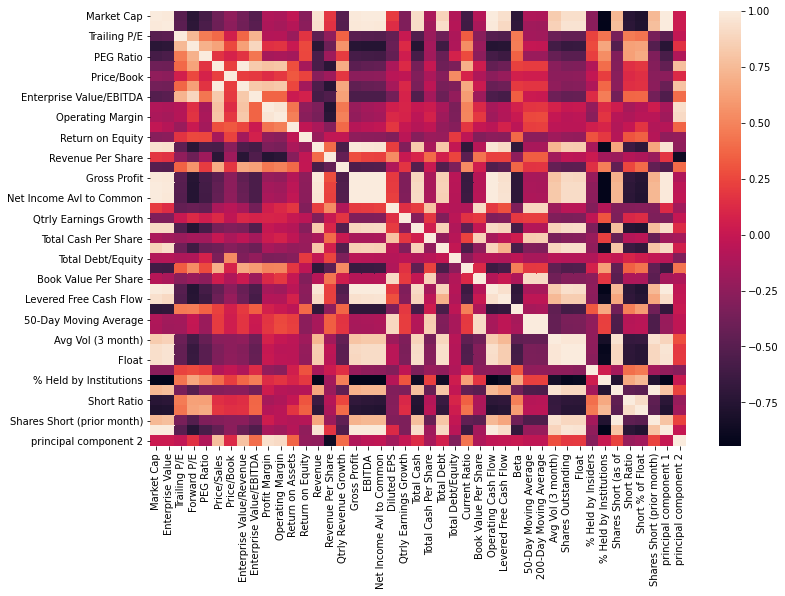

In [27]:
sns.heatmap(pca_df.corr())

In [28]:
corr=pca_df.corr()

In [29]:
corr.iloc[-2].sort_values(ascending = False).head(15) # The Principal component 1's correlations of the features

principal component 1         1.000000
Operating Cash Flow           0.994653
Enterprise Value              0.994057
Market Cap                    0.992444
EBITDA                        0.991473
Net Income Avl to Common      0.990713
Gross Profit                  0.986017
Shares Outstanding            0.962084
Float                         0.958825
Revenue                       0.955238
Levered Free Cash Flow        0.927690
Total Cash                    0.926926
Total Debt                    0.908776
Avg Vol (3 month)             0.882599
Shares Short (prior month)    0.799426
Name: principal component 1, dtype: float64

In [30]:
corr.iloc[-1].sort_values(ascending = False).head(10) # The Principal component 2's correlations of the features

principal component 2       1.000000
Profit Margin               0.932396
Operating Margin            0.915834
Enterprise Value/Revenue    0.789915
Price/Sales                 0.772618
Current Ratio               0.436743
Enterprise Value/EBITDA     0.405510
Qtrly Revenue Growth        0.394331
Return on Assets            0.366261
Avg Vol (3 month)           0.283310
Name: principal component 2, dtype: float64

# PCA Solution Version


In [31]:
# Getting rid of the NaN values.
#data_features.dropna(how='any', inplace=True)

# Normalizing features
data_features_N = (data_features - data_features.mean()) / data_features.std()

features_tickers = data_features_N.columns.values  #Column names, not actual stock tickers!

# Generate the train set and test set by randomly splitting the dataset
X_train, X_test = train_test_split(data_features_N,  test_size=0.2)

In [32]:
# Applying Principle Component Analysis
# Creating covariance matrix and training data on PCA.
cov_matrix = X_train.loc[:,features].cov()
#num_pc = 11 
pca = PCA()
pca.fit(cov_matrix)

PCA()

In [33]:
var_threshold = 0.95
var_explained = np.cumsum(pca.explained_variance_ratio_)
num_comp = np.where(np.logical_not(var_explained < var_threshold))[0][0] + 1 

In [34]:
print('%d principal components explain %.2f%% of variance' %(num_comp, 100* var_threshold))

12 principal components explain 95.00% of variance


12 principal components explain 95.00% of variance


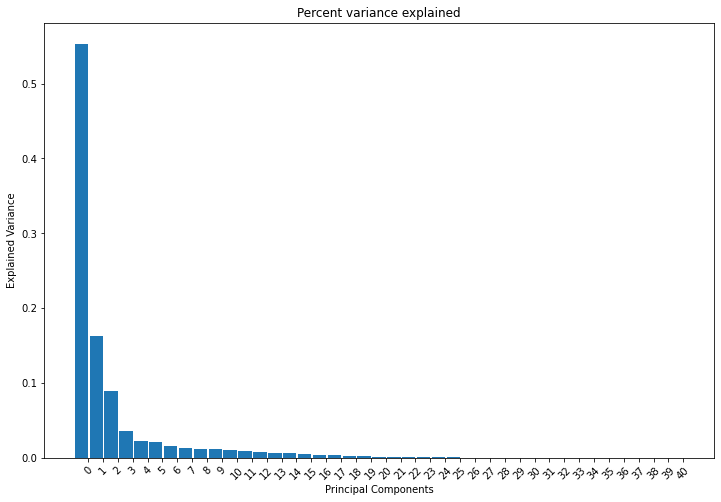

In [35]:
def plotPCA(plot=False):

    # Visualizing Variance against number of principal components.
    cov_matrix = X_train.loc[:,features].cov()

    var_threshold = 0.95
    var_explained = np.cumsum(pca.explained_variance_ratio_)
    num_comp = np.where(np.logical_not(var_explained < var_threshold))[0][0] + 1  

    if plot:
        print('%d principal components explain %.2f%% of variance' %(num_comp, 100* var_threshold))

        # PCA percent variance explained.
        bar_width = 0.9
        n_asset = features_tickers.shape[0]
        x_indx = np.arange(n_asset)
        fig, ax = plt.subplots()

        # Eigenvalues measured as percentage of explained variance.
        rects = ax.bar(x_indx, pca.explained_variance_ratio_[:n_asset], bar_width)
        ax.set_xticks(x_indx + bar_width / 2)
        ax.set_xticklabels(list(range(n_asset)), rotation=45)
        ax.set_title('Percent variance explained')
        ax.set_ylabel('Explained Variance')
        ax.set_xlabel('Principal Components')
        plt.show()

plotPCA(plot=True)

### Extra 1.1.0 - Stock PCA PLOT

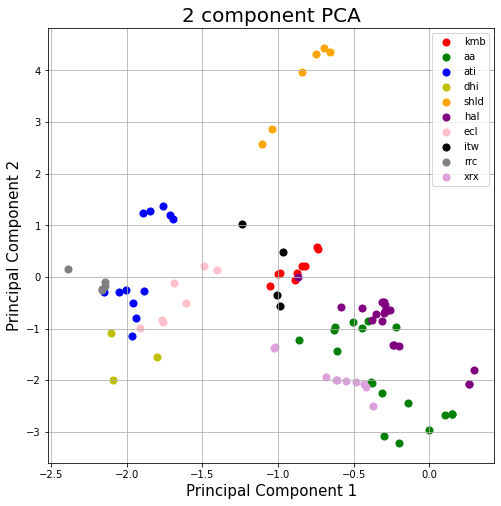

In [36]:
#Importing the data
# data_df = pd.read_csv("keystats.csv", index_col="Date")
# data_df.dropna(axis=0, how="any", inplace=True)

# features = data_df.columns[6:]
# data_features = data_df[features]

# Normalizing features
data_features_N = (data_features - data_features.mean()) / data_features.std()

X = data_features_N.values
pca = PCA(n_components=2) # Choose 2 components is to plot the scatterplot
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
features_tickers = data_df["Ticker"].values
principalDf['Ticker']=features_tickers

#Plot the stocks
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = set(features_tickers) # Tickers
colors = ['r', 'g', 'b', 'y', 'orange', 'purple', 'pink', 'black', 'grey','plum']
for ticker, color in zip(targets,colors):
    indicesToKeep = principalDf['Ticker'] == ticker
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### Extra 1.1.1 - Input your stock tickers in the "targets" line

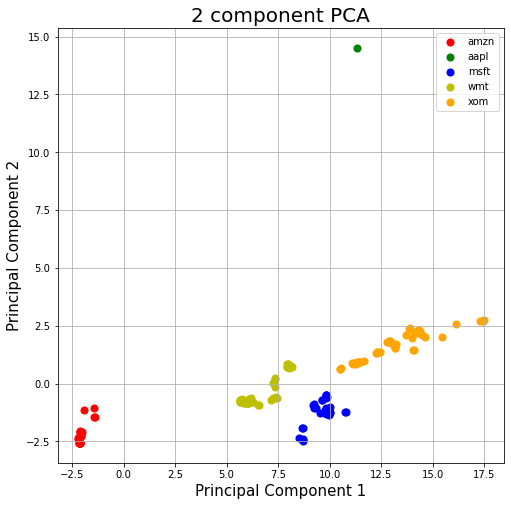

In [37]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['amzn','aapl', 'msft','wmt','xom']  # Use any stocks you'd like
colors = ['r', 'g', 'b','y','orange','purple']
for ticker, color in zip(targets,colors):
    indicesToKeep = principalDf['Ticker'] == ticker
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### Extra 1.2.0 - What features most correlated to principle components?

In [38]:
corr = pd.concat([principalDf,data_features_N.reset_index()],axis=1).corr()
corr.iloc[0].sort_values(ascending = False).head(10) # The Principal component 1's correlations of the features

principal component 1       1.000000
Operating Cash Flow         0.944382
EBITDA                      0.933497
Market Cap                  0.925907
Net Income Avl to Common    0.920095
Gross Profit                0.906682
Enterprise Value            0.905245
Shares Outstanding          0.881926
Float                       0.872669
Revenue                     0.791920
Name: principal component 1, dtype: float64

In [39]:
corr.iloc[1].sort_values(ascending = False).head(10) # The Principal component 2's correlations of the features

principal component 2     1.000000
200-Day Moving Average    0.916712
50-Day Moving Average     0.908884
Diluted EPS               0.883957
Total Cash Per Share      0.718691
Book Value Per Share      0.716388
Revenue Per Share         0.351678
Operating Margin          0.302919
Profit Margin             0.229498
Price/Sales               0.221073
Name: principal component 2, dtype: float64

## Question 3 Construct the PCS Weights:
Fill in the formula below for the weights and produce the graph below

In [40]:
# Getting rid of the NaN values.
#data_features.dropna(how='any', inplace=True)

# Normalizing features
data_features_N = (data_features - data_features.mean()) / data_features.std()

features_tickers = data_features_N.columns.values  #Column names, not actual stock tickers!

# Generate the train set and test set by randomly splitting the dataset
X_train, X_test = train_test_split(data_features_N,  test_size=0.2)

In [41]:
# Applying Principle Component Analysis
# Creating covariance matrix and training data on PCA.
cov_matrix = X_train.loc[:,features].cov()
#num_pc = 11 
pca = PCA()
pca.fit(cov_matrix)

PCA()

In [42]:
projected = pca.fit_transform(cov_matrix)
pcs = pca.components_

Sum of weights of current eigenvalue-portfolio: 1.00


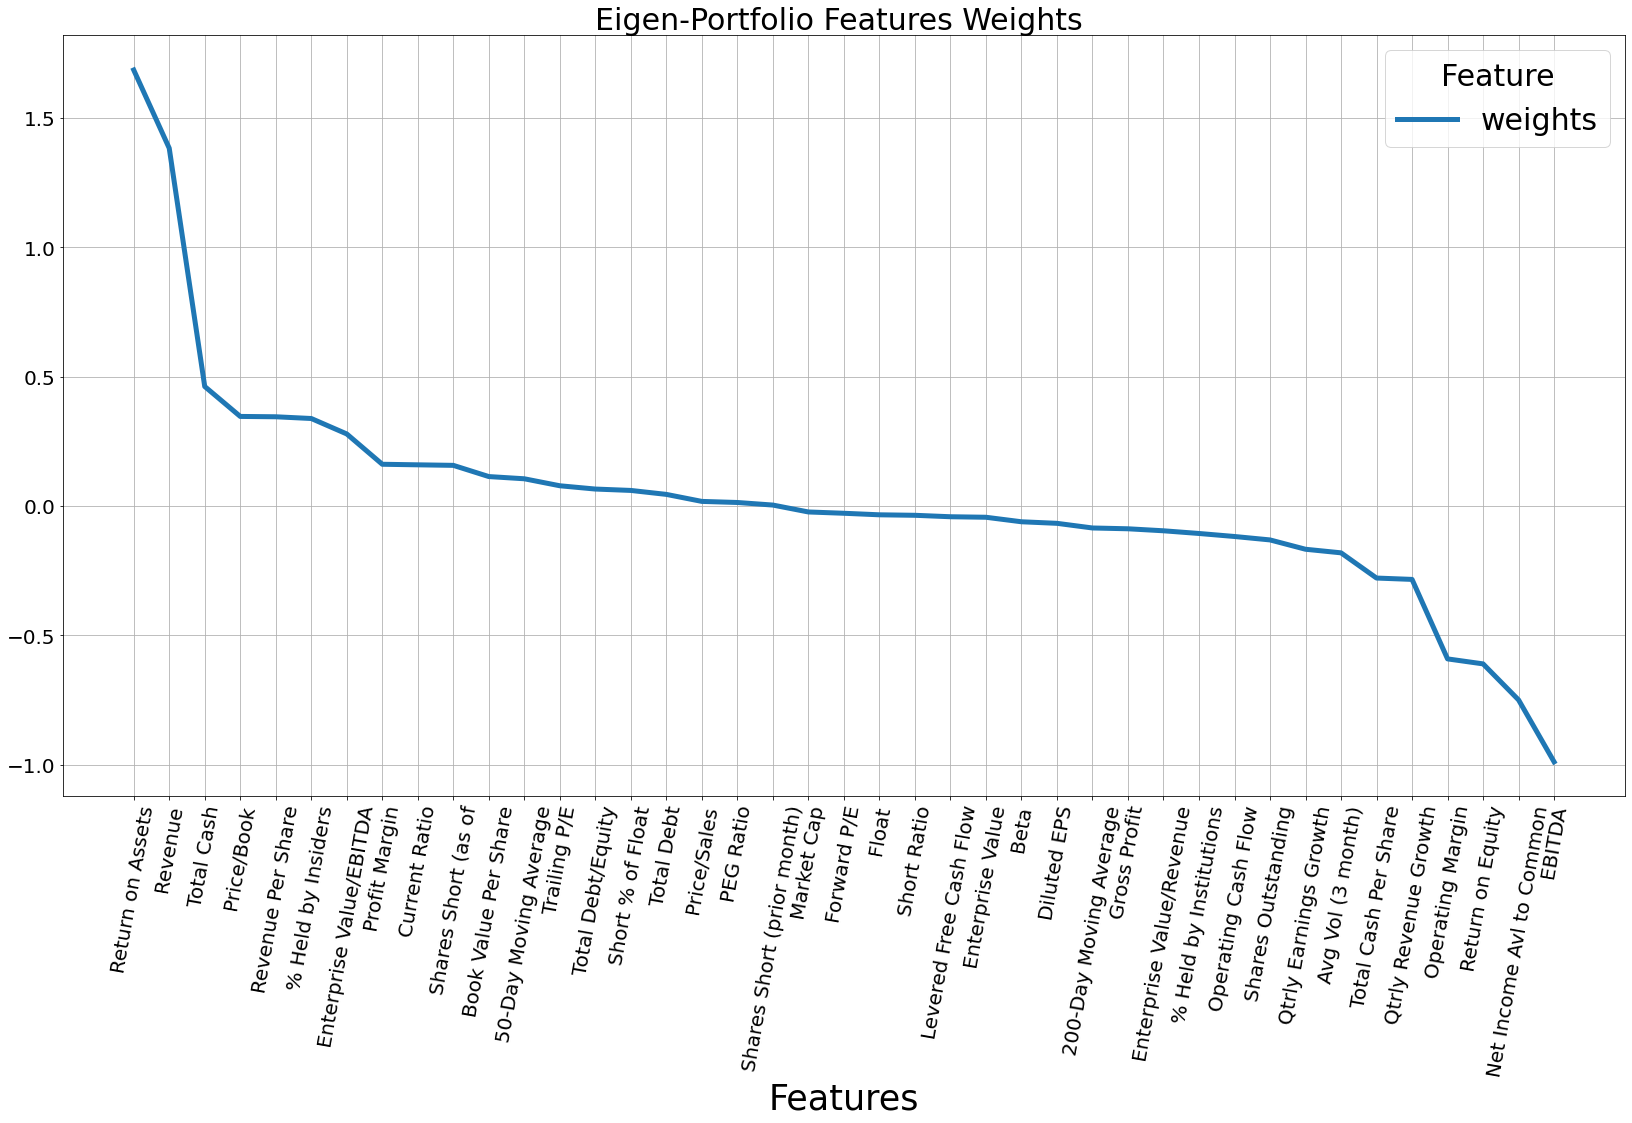

,weights
Return on Assets,1.684937
Revenue,1.382672
Total Cash,0.461630
Price/Book,0.345946
Revenue Per Share,0.344611
% Held by Insiders,0.337920
Enterprise Value/EBITDA,0.278213
Profit Margin,0.161067
Current Ratio,0.158901
Shares Short (as of,0.156839


In [43]:
def PCWeights():
    '''
    Principal Components (PC) weights for each 41 PCs
    '''
    weights = pd.DataFrame()

    for i in range(len(pcs)):
# Fill here
        weights["weights_{}".format(i)] = pcs[:, i] / sum(pcs[:, i])

    weights = weights.values.T
    return weights

weights = PCWeights()
portfolio = portfolio = pd.DataFrame()

def PlotWeights(weights, plot=False, portfolio=portfolio):
    
# Fill Here
    data_feature_N = {'weights': weights.squeeze()}
    portfolio = pd.DataFrame(data_feature_N, index = features_tickers) 
    portfolio.sort_values(by=['weights'], ascending=False, inplace=True)
    
    if plot:
        print('Sum of weights of current eigenvalue-portfolio: %.2f' % np.sum(portfolio))
        ax = portfolio.plot(title='Current Eigenvalue -Portfolio Weights', 
            figsize=(28,14), 
            xticks=range(0, len(features_tickers),1), 
            rot=80, 
            linewidth=5
            )
        
    plt.tick_params(labelsize = 20)
    plt.xlabel('Features', fontsize=35)
    plt.grid(True)
    plt.title('Eigen-Portfolio Features Weights ',fontdict={'fontsize':30})
    legend = ax.legend(loc=0, ncol=1, bbox_to_anchor=(0, 0, 1,1),fancybox=True,shadow=False,title='Feature',prop={'size':30})
    plt.setp(legend.get_title(),fontsize='30')
    plt.show()

    return portfolio

# Weights are stored in arrays, where 0 is the first PC's weights.
PlotWeights(weights=weights[4], plot=True)

## Naive Data Split for training and testing

### Pair & Basket of Stocks Regression

In [44]:
#split the data into training and test sets
prices_yf_adj_close_train = prices_yf_adj_close.loc['2012-01-01':'2019-01-31']
prices_yf_adj_close_test = prices_yf_adj_close.loc['2019-02-01':'2019-10-01']

In [45]:
type(prices_yf_adj_close)

pandas.core.frame.DataFrame

In [46]:
prices_yf_adj_close_train['Adj Close',  'AMZN']

Date
2012-01-03     179.029999
2012-01-04     177.509995
2012-01-05     177.610001
2012-01-06     182.610001
2012-01-09     178.559998
                 ...     
2019-01-25    1670.569946
2019-01-28    1637.890015
2019-01-29    1593.880005
2019-01-30    1670.430054
2019-01-31    1718.729980
Name: (Adj Close, AMZN), Length: 1781, dtype: float64

## Question 4 . Do a multi- Linear Regression where the response is Walmart
Fill in equations below.
What do you conclude from the results of R-squared ?

In [47]:
import statsmodels.api as sm

In [48]:
from statsmodels import regression
# Amazon_ret = np.log(prices_yf_adj_close_train['AMZN'])
# Walmart_ret = np.log(prices_yf_adj_close_train['WMT']) 
# Apple_ret  =  np.log(prices_yf_adj_close_train['AAPL'])
# MSFT_ret   =  np.log(prices_yf_adj_close_train['MSFT'])
# mobil_ret   = np.log(prices_yf_adj_close_train['XOM']) 
# sears_ret   = np.log(prices_yf_adj_close_train['SHLDQ'])

Amazon_ret = np.log(prices_yf_adj_close_train['Adj Close', 'AMZN'])
Walmart_ret = np.log(prices_yf_adj_close_train['Adj Close', 'WMT']) 
Apple_ret  =  np.log(prices_yf_adj_close_train['Adj Close', 'AAPL'])
MSFT_ret   =  np.log(prices_yf_adj_close_train['Adj Close', 'MSFT'])
mobil_ret   = np.log(prices_yf_adj_close_train['Adj Close', 'XOM']) 
sears_ret   = np.log(prices_yf_adj_close_train['Adj Close', 'SHLDQ'])

# Fill here
slr = regression.linear_model.OLS(Walmart_ret, sm.add_constant(Amazon_ret)).fit() # Y is Walmart_ret, X is sm.add_constant(Amazon)
slr_prediction = slr.params[0] + slr.params[1]*Amazon_ret #params[1] is the coefficient, params[0] is the constant 

# Run multiple linear regression using x1, x2, x3, x4 , x5 to explain Walmart

# Fill here 
mlr = regression.linear_model.OLS(Walmart_ret, sm.add_constant(np.column_stack((Amazon_ret,Apple_ret,MSFT_ret,mobil_ret, sears_ret)))).fit()
mlr_prediction = mlr.params[0] + mlr.params[1]*Amazon_ret + mlr.params[2]*Apple_ret + mlr.params[3]*MSFT_ret + mlr.params[4]*mobil_ret  + mlr.params[5]*sears_ret


# Compute adjusted R-squared for the two different models
print ('SLR R-squared:', slr.rsquared_adj) 
print ('MLR R-squared:', mlr.rsquared_adj)
# Plot y along with the two different predictions


print ("R-squared values of linear regression")
print ("Walmart and Amazon: ", slr.rsquared)
print ("Walmart and Basket: ", mlr.rsquared)


SLR R-squared: 0.560171253378288
MLR R-squared: 0.7372479804131391
R-squared values of linear regression
Walmart and Amazon:  0.5604183481797609
Walmart and Basket:  0.7379860478838888


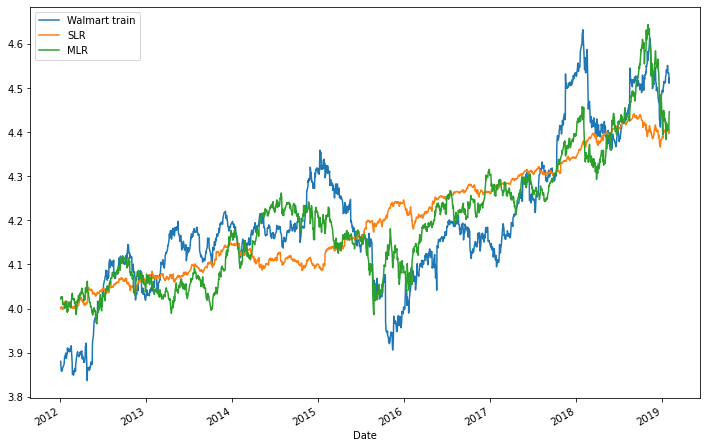

In [49]:
Walmart_ret.plot()
slr_prediction.plot()
mlr_prediction.plot()
plt.legend(['Walmart train', 'SLR', 'MLR']);

## Question 5 : Redo the above on the test part of the data
Fill below the equations.
What do you conclude from the output of the results below . Explain your findings

SLR R-squared: -8.962829681410193
MLR R-squared: -2.0509046806907514


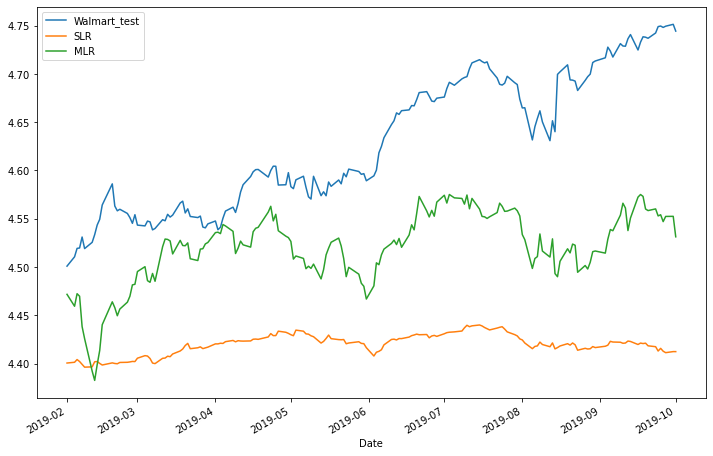

In [50]:
# Extend our model from before to the new time period

# Fill Here :
Amazon_test = np.log(prices_yf_adj_close_test['Adj Close','AMZN'])
Walmart_test = np.log(prices_yf_adj_close_test['Adj Close','WMT']) 
Apple_test  =  np.log(prices_yf_adj_close_test['Adj Close','AAPL'])
MSFT_test   =  np.log(prices_yf_adj_close_test['Adj Close','MSFT'])
mobil_test   = np.log(prices_yf_adj_close_test['Adj Close','XOM']) 
sears_test   = np.log(prices_yf_adj_close_test['Adj Close','SHLDQ'])

slr_prediction2 = slr.params[0] + slr.params[1]*Amazon_test
mlr_prediction2 = mlr.params[0] + mlr.params[1]*Amazon_test + mlr.params[2]*Apple_test + mlr.params[3]*MSFT_test + mlr.params[4]*mobil_test + mlr.params[5]*sears_test


# Compute adjusted R-squared over the extended time period
adj = float(len(Walmart_test) - 1)/(len(Walmart_test) - 5) # Compute adjustment factor
SST = sum((Walmart_test - np.mean(Walmart_test))**2)
SSRs = sum((slr_prediction2 - Walmart_test)**2)
print ('SLR R-squared:', 1 - adj*SSRs/SST)
SSRm = sum((mlr_prediction2 - Walmart_test)**2)
print ('MLR R-squared:', 1 - adj*SSRm/SST)

# Plot y along with the two different predictions
Walmart_test.plot()
slr_prediction2.plot()
mlr_prediction2.plot()
plt.legend(['Walmart_test', 'SLR', 'MLR']);

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     ('Adj Close', 'WMT')   R-squared:                       0.560
Model:                              OLS   Adj. R-squared:                  0.560
Method:                   Least Squares   F-statistic:                     2268.
Date:                  Sat, 03 Apr 2021   Prob (F-statistic):          7.69e-320
Time:                          02:15:26   Log-Likelihood:                 1414.4
No. Observations:                  1781   AIC:                            -2825.
Df Residuals:                      1779   BIC:                            -2814.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     3.0612      0.024    127.496      0.000       3.014       3.108
('Adj Close', 'AMZN')     0.1812      0.004     47.624      0.000       0.174       0.189
==============================================================================
Omnibus:                       25.713   Durbin-Watson:                   0.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.572
Skew:                          -0.294   Prob(JB):                     1.70e-06
Kurtosis:                       2.886   Cond. No.                         59.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

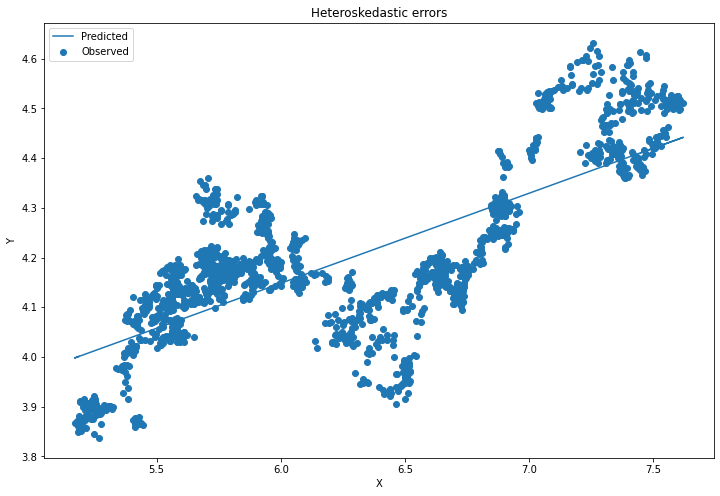

In [51]:
# Plot data and regression line
plt.scatter(Amazon_ret, Walmart_ret)
plt.plot(Amazon_ret, slr_prediction)
plt.title('Heteroskedastic errors')
plt.legend(['Predicted', 'Observed'])
plt.xlabel('X')
plt.ylabel('Y')

# Print summary of regression results
slr.summary()

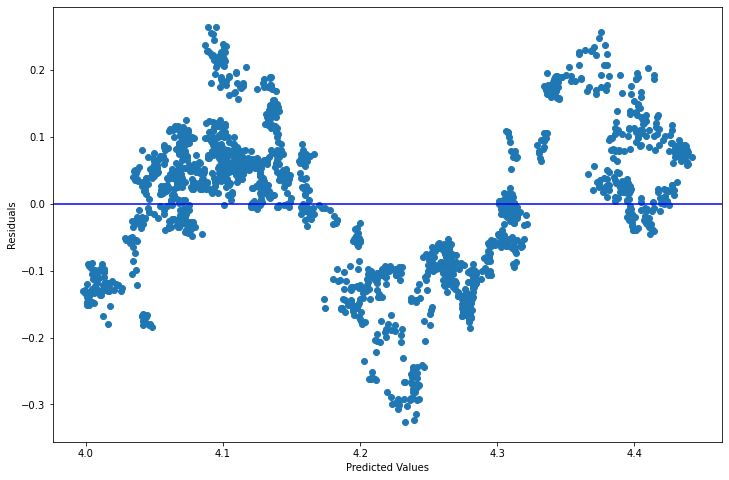

In [52]:
residuals1 = slr.resid

plt.scatter(slr_prediction, residuals1);
plt.axhline(0, color='blue')
plt.xlabel('Predicted Values');
plt.ylabel('Residuals');

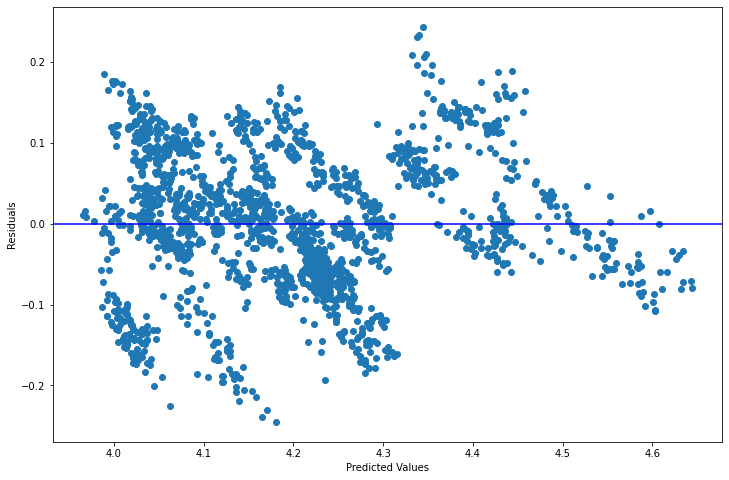

In [53]:
residuals2 = mlr.resid

plt.scatter(mlr_prediction, residuals2);
plt.axhline(0, color='blue')
plt.xlabel('Predicted Values');
plt.ylabel('Residuals');

## Question 6 : What do the above graphs indicate - Review lecture notes but try to understand why ?
Data Split & Rescaling

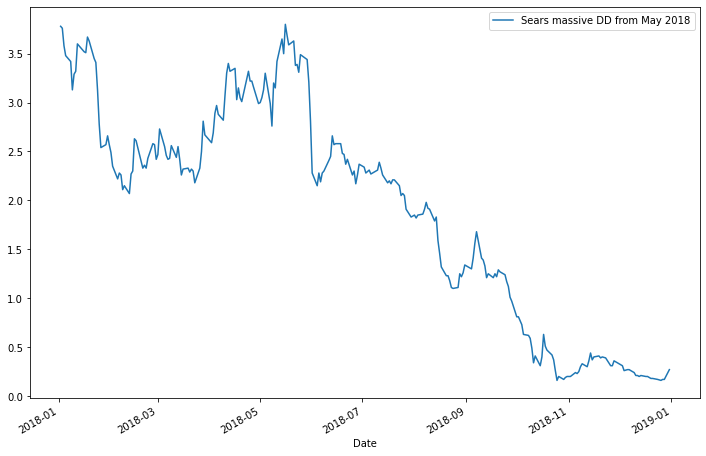

In [54]:
Sears = prices_yf_adj_close['Adj Close','SHLDQ'].loc['2018-01-02':'2019-01-01']
Sears.plot()
plt.legend(['Sears massive DD from May 2018'])

Pair Trading

## Question 7: Do a test Cointegration
Fill the equation below
What do you conclude ?

In [55]:
import statsmodels.tsa.stattools as ts 

Amazon and Walmart Returns are not cointegrated
0.6947261719595758


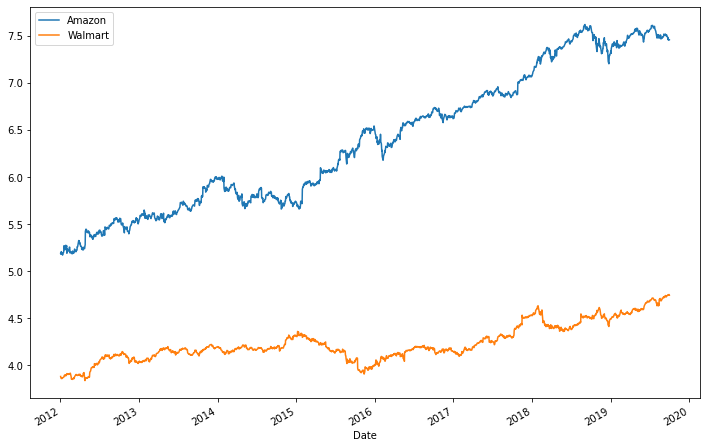

In [56]:
Amazon = np.log(prices_yf_adj_close['Adj Close','AMZN'])
Walmart = np.log(prices_yf_adj_close['Adj Close','WMT'])

# Fill the equation below with a cointegration function
score, pvalue, _ = ts.coint(Amazon,Walmart)

confidence_level = 0.05

if pvalue < confidence_level:
    print ("Amazon and Walmart Returns are cointegrated")
    print (pvalue)
else:
    print ("Amazon and Walmart Returns are not cointegrated")
    print (pvalue) 
    
Amazon.name = "Amazon"
Walmart.name = "Walmart"
pd.concat([Amazon, Walmart], axis=1).plot();

## Question 8 : Repeat the Cointegration test on IBM and Intel
Fill the equation below¶
What do you conclude ?

IBM and Intel are cointegrated
0.040469411931378645


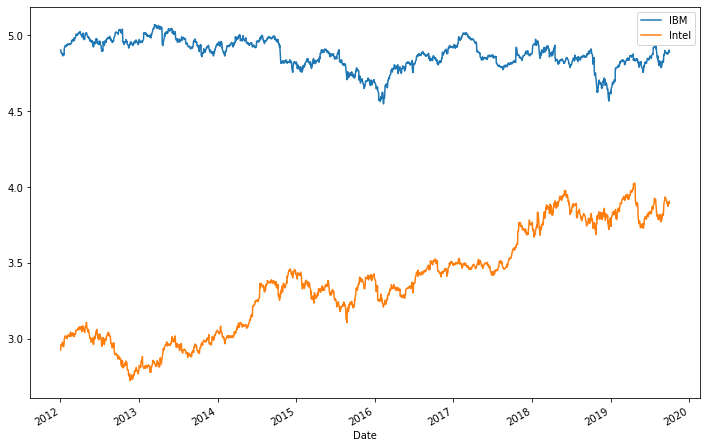

In [57]:
IBM = np.log(prices_yf_adj_close['Adj Close','IBM'])
Intel = np.log(prices_yf_adj_close['Adj Close','INTC'])

# Fill Here 
score, pvalue, _ = ts.coint(IBM, Intel)

confidence_level = 0.05

if pvalue < confidence_level:
    print ("IBM and Intel are cointegrated")
    print (pvalue)
else:
    print ("IBM and Intel are not cointegrated")
    print (pvalue) 

IBM.name = "IBM"
Intel.name = "Intel"
pd.concat([IBM, Intel], axis=1).plot();  

Basket Strategy

In [58]:
# run multi-regression using sears on the (amzon, Cisco, Intel, 3M)
intel_ret   =  np.log(prices_yf_adj_close_train['Adj Close','INTC'])
mmm_ret   = np.log(prices_yf_adj_close_train['Adj Close','MMM'])
cisco_ret   = np.log(prices_yf_adj_close_train['Adj Close','CSCO']) 

mlr = regression.linear_model.OLS(sears_ret, sm.add_constant(np.column_stack((Amazon_ret,intel_ret,mmm_ret, cisco_ret)))).fit()

mlr_prediction = mlr.params[0] + mlr.params[1]*Amazon_ret + mlr.params[2]*intel_ret + mlr.params[3]*mmm_ret + mlr.params[4]*cisco_ret

print ('MLR R-squared:', mlr.rsquared_adj)

MLR R-squared: 0.8800205866322471


In [59]:
from statsmodels.tsa.stattools import adfuller # adfuller test

p-value for in-sample stationarity:  0.003964715604681419
t-statistics for in-sample stationarity:  -3.710731328840356


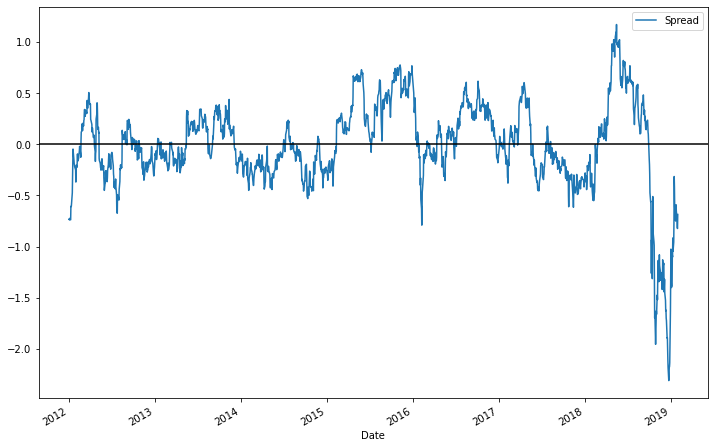

In [60]:
spread = sears_ret - mlr_prediction
print ("p-value for in-sample stationarity: ", adfuller(spread)[1])
print ("t-statistics for in-sample stationarity: ", adfuller(spread)[0])
# The p-value is less than 0.05 so we conclude that this spread calculation is stationary in sample
spread.plot()
plt.axhline(spread.mean(), color='black')
plt.legend(['Spread']);

Text(0, 0.5, 'price levels')

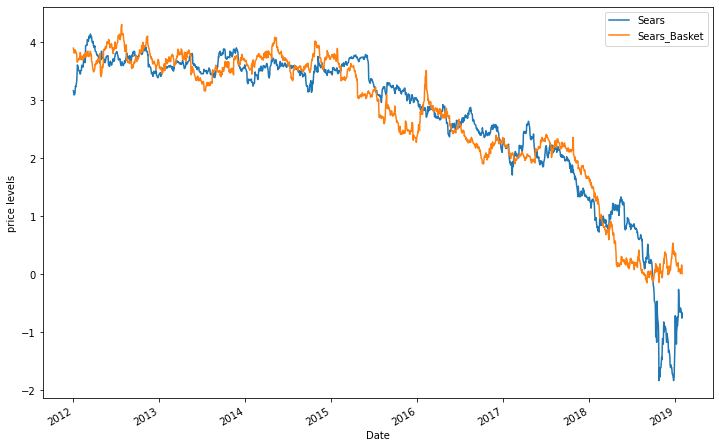

In [61]:
sears_ret.name = "Sears"
mlr_prediction.name = "Sears_Basket"
pd.concat([sears_ret, mlr_prediction], axis=1).plot();
plt.ylabel('price levels')

In [62]:
# Test Period
intel_test   =  np.log(prices_yf_adj_close_test['Adj Close','INTC'])
mmm_test   = np.log(prices_yf_adj_close_test['Adj Close','MMM'])
cisco_test   = np.log(prices_yf_adj_close_test['Adj Close','CSCO']) 

mlr_prediction_test = mlr.params[0] + mlr.params[1]*Amazon_test + mlr.params[2]*intel_test + mlr.params[3]*mmm_test + mlr.params[4]*cisco_test 

In [63]:
S_test = sears_test - mlr_prediction_test

p-value for out-sample stationarity:  0.2262873554344954
t-statistics for out-sample stationarity:  -2.1463564462524816


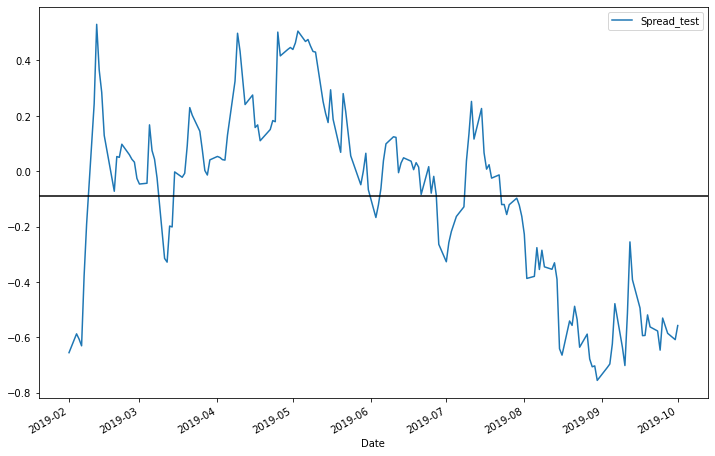

In [64]:
print ("p-value for out-sample stationarity: ", adfuller(S_test)[1])
print ("t-statistics for out-sample stationarity: ", adfuller(S_test)[0])
# The p-value is less than 0.05 so we conclude that this spread calculation is stationary in sample
S_test.plot()
plt.axhline(S_test.mean(), color='black')
plt.legend(['Spread_test']);

## Question 9 : do you trust the above results ? explain ?

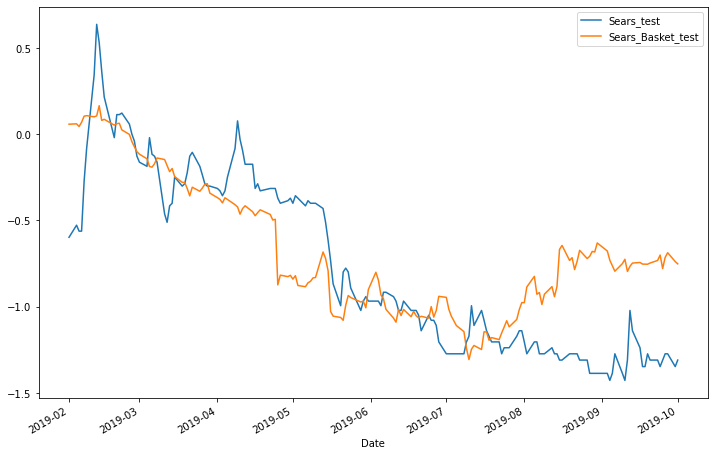

In [65]:
# Check the test set
sears_test.name = "Sears_test"
mlr_prediction_test.name = "Sears_Basket_test"
pd.concat([sears_test, mlr_prediction_test], axis=1).plot();

Basket Strategy

## Cross Validation

In [66]:
# random split of training and test sets.
# Predictors
exclude = [['Adj Close','WMT'], ['Adj Close','MSFT'],['Adj Close','XOM'], ['Adj Close','IBM'],['Adj Close','GE'],['Adj Close','AAPL'],['Adj Close','SHLDQ']]
BSKT = np.log(prices_yf_adj_close.loc[:, prices_yf_adj_close.columns.difference(exclude)])
# Traget / Response variable
#SER = np.log(prices_yf_adj_close.loc[:, prices_yf_adj_close.columns == 'SHLDQ']) 

In [67]:
prices_yf_adj_close.columns[6]

('Adj Close', 'SHLDQ')

In [68]:
SER = np.log(prices_yf_adj_close.loc[:,prices_yf_adj_close.columns[6]])
SER = pd.DataFrame(SER)

In [69]:
BSKT

Attributes Adj Close                              
Symbols         AMZN      CSCO      INTC       MMM
Date                                              
2012-01-03  5.187553  2.648765  2.925692  4.172197
2012-01-04  5.179027  2.667904  2.948654  4.180427
2012-01-05  5.179590  2.664211  2.960137  4.175903
2012-01-06  5.207353  2.660504  2.954214  4.170758
2012-01-09  5.184925  2.666850  2.962889  4.176738
...              ...       ...       ...       ...
2019-09-25  7.477791  3.854781  3.896116  5.046481
2019-09-26  7.461548  3.838933  3.894155  5.045444
2019-09-27  7.453243  3.839138  3.891401  5.049707
2019-09-30  7.459287  3.850741  3.906063  5.048917
2019-10-01  7.459137  3.816358  3.891007  5.011611

[1949 rows x 4 columns]

In [70]:
SER

,Adj Close
,SHLDQ
Date,
2012-01-03,3.166408
2012-01-04,3.146160
2012-01-05,3.123835
2012-01-06,3.092814
2012-01-09,3.109455
...,...
2019-09-25,-1.309333
2019-09-26,-1.272966


In [71]:
daterng = SER.index

In [72]:
df_BSKT = pd.DataFrame(daterng,columns=['Date'])
df_SER = pd.DataFrame(daterng,columns=['Date'])

In [73]:
df_BSKT['Date']

0      2012-01-03
1      2012-01-04
2      2012-01-05
3      2012-01-06
4      2012-01-09
          ...    
1944   2019-09-25
1945   2019-09-26
1946   2019-09-27
1947   2019-09-30
1948   2019-10-01
Name: Date, Length: 1949, dtype: datetime64[ns]

In [74]:
df_BSKT

,Date
0,2012-01-03
1,2012-01-04
2,2012-01-05
3,2012-01-06
4,2012-01-09
...,...
1944,2019-09-25
1945,2019-09-26
1946,2019-09-27
1947,2019-09-30


In [75]:
df_BSKT = pd.concat([pd.DataFrame(daterng),pd.DataFrame(BSKT.values, columns = ['AMZN','CSCO','INTC','MMM'])],axis = 1)
df_BSKT

,Date,AMZN,CSCO,INTC,MMM
0,2012-01-03,5.187553,2.648765,2.925692,4.172197
1,2012-01-04,5.179027,2.667904,2.948654,4.180427
2,2012-01-05,5.179590,2.664211,2.960137,4.175903
3,2012-01-06,5.207353,2.660504,2.954214,4.170758
4,2012-01-09,5.184925,2.666850,2.962889,4.176738
...,...,...,...,...,...
1944,2019-09-25,7.477791,3.854781,3.896116,5.046481
1945,2019-09-26,7.461548,3.838933,3.894155,5.045444
1946,2019-09-27,7.453243,3.839138,3.891401,5.049707
1947,2019-09-30,7.459287,3.850741,3.906063,5.048917


In [76]:
df_SER = pd.concat([pd.DataFrame(daterng),pd.DataFrame(SER.values, columns = ['SHLDQ'])],axis = 1)
df_SER

,Date,SHLDQ
0,2012-01-03,3.166408
1,2012-01-04,3.146160
2,2012-01-05,3.123835
3,2012-01-06,3.092814
4,2012-01-09,3.109455
...,...,...
1944,2019-09-25,-1.309333
1945,2019-09-26,-1.272966
1946,2019-09-27,-1.272966
1947,2019-09-30,-1.347074


## Naive problematic split

In [77]:
BSKT_train = BSKT.loc['2012-01-01':'2019-01-31']
BSKT_test = BSKT.loc['2019-02-01':'2019-10-01']
SER_train = SER.loc['2012-01-01':'2019-01-31']
SER_test = SER.loc['2019-02-01':'2019-10-01']

In [78]:
BSKT_train, BSKT_test, SER_train, SER_test = train_test_split(BSKT,SER, test_size=0.15)

## Time Series Split per sklearn API CV Approach

In [79]:
import datetime
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import TimeSeriesSplit , cross_val_score
 #conda update scikit-learn == 0.24 

The training set has size i * n_samples // (n_splits + 1) + n_samples % (n_splits + 1) in the i th split, with a test set of size n_samples//(n_splits + 1) by default, where n_samples is the number of samples.

In [80]:
import sklearn

In [81]:
print('The scikit-learn version is {}.'.format(sklearn.__version__)) # Make sure update to the right version

The scikit-learn version is 0.24.0.


In [82]:
tscv = TimeSeriesSplit(n_splits=5, gap=5)

In [83]:
from sklearn.compose import TransformedTargetRegressor
scores = []
scores2 = []

tscv = TimeSeriesSplit(n_splits=10, gap=5)
for train_index, test_index in tscv.split(df_BSKT):
    print("TRAIN:", train_index) , print ("TEST:", test_index)
    BSKT_train2, BSKT_test2 = df_BSKT.iloc[train_index].drop('Date', axis=1), df_BSKT.iloc[test_index].drop('Date', axis=1)
    SER_train2, SER_test2 = df_SER.iloc[train_index].drop('Date', axis=1), df_SER.iloc[test_index].drop('Date', axis=1)

    clf = LinearRegression()
    
    # if you want to use log transform , then func = np.log and the inverse_func = np.exp .  Otherwise since we already
    # did log transform we set both to None
    lr = TransformedTargetRegressor(
        regressor=clf, 
        func=None, inverse_func= None) 
    
    lr.fit(BSKT_train2,SER_train2)

    preds_SER2 = lr.predict(BSKT_test2)

    # accuracy for the current fold only
    r2score2 = lr.score(BSKT_test2,SER_test2)
    
    scores_cv = cross_val_score(lr, BSKT_train2, SER_train2, cv=tscv)


    scores.append(r2score2)
    scores2.append(scores_cv)

# this is the average accuracy over all folds
average_r2score = np.mean(scores)
print(" Linear Regression Rsquare: {0:.3f} (+/- {1:.3f})".format(np.mean(scores), np.std(scores)))
print(" CV Accuracy: {0:.3f} (+/- {1:.3f})".format(np.mean(scores2), np.std(scores2)))
#### End of example ####

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173]
TEST: [179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232
 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 

## Question 10 : Pretty bad result Why ?
Can you explain why from the graph below

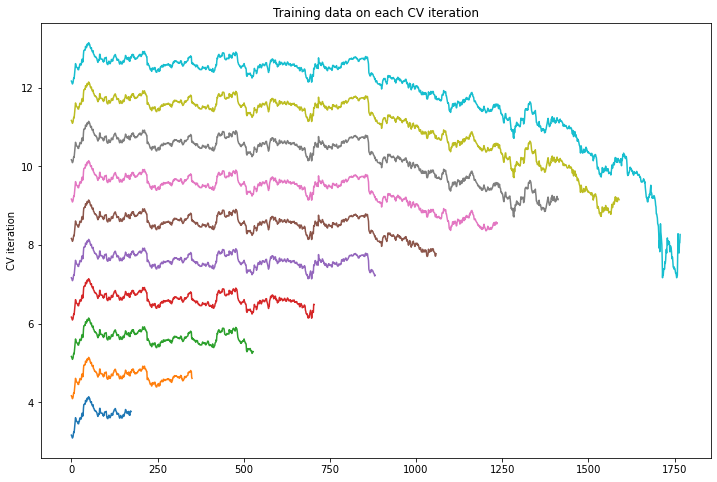

In [84]:
# Iterate through CV splits
fig, ax = plt.subplots()
for ii, (tr, tt) in enumerate(tscv.split(df_BSKT, df_SER)):
    # Plot the training data on each iteration, to see the behavior of the CV
    ax.plot(tr, ii + df_SER.iloc[tr].drop('Date', axis=1));
    
ax.set(title='Training data on each CV iteration', ylabel='CV iteration');

It seems that TimeSeriesSplit per sklearn does not work correctly

In [85]:
# Linear Regression
clf = LinearRegression()

#tscv = TimeSeriesSplit(n_splits=2,  max_train_size= len(SER_train), test_size=len(SER_test), gap=5)
#tscv = TimeSeriesSplit(n_splits=5, gap=6)
#gwfcv = GapWalkForward(n_splits=3, gap_size=5, test_size=82)
#gcv = GapKFold(n_splits=5, gap_before=5, gap_after=5)


scores = cross_val_score(clf, BSKT_train, SER_train, cv=tscv)
print("Accuracy: {0:.3f} (+/- {1:.3f})".format(scores.mean(), scores.std()))

Accuracy: 0.924 (+/- 0.012)


In [86]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.92 accuracy with a standard deviation of 0.01


In [87]:
clf.fit(BSKT_train,SER_train)

preds_SER = clf.predict(BSKT_test)

# accuracy for the current fold only    
r2score = clf.score(BSKT_test,SER_test)
r2score

0.9225731337920339

## Question 11 : Why ironically the Naive split have better results than the celebrated TimeSeries Split ?

## Question 12 : Go inside the function TimeSeriesSplit
( https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.TimeSeriesSplit.html , next to the function go to source)

1 Find a way to make it work correctly as a Walk Forward CV : Here some hints:
i) put a variable in the function that allows the size of train data to be set
ii) Set the test set to be a factor f * size of train set
iii) - move the train set forward N steps but with constant size, using a variable call it Moving Window of size N

## Question 13 : Repeat the above analysis using your new WFCV algo on the linear regression model .
Do you see any imporvment if yes why and if not why ?

## Question 14 : Repeat the above analysis using Support Vector Machine algo instead of linear regression .
Do you see any imporvment if yes why and if not why ?

SVR

Naive basic Split

In [100]:
# random split of training and test sets.
# Predictors
# Pred = prices_yf_adj_close.loc[:, prices_yf_adj_close.columns != 'WMT']
# # Traget / Response variable
# Tgt = prices_yf_adj_close.loc[:, prices_yf_adj_close.columns == 'WMT']

Pred = pd.concat([prices_yf_adj_close.iloc[:,0:5],prices_yf_adj_close.iloc[:,6:]],axis=1)

Tgt = pd.DataFrame(prices_yf_adj_close.iloc[:,5])

# rename
Z = Pred
U = Tgt
##

Z_train, Z_test, U_train, U_test = train_test_split(Z, U,test_size=0.2, random_state=0)

In [101]:
from sklearn.preprocessing import StandardScaler

In [102]:
## if want to use non linear kernel in SVM such as rbf then feature scalimg must be done
sc_Z = StandardScaler()
Zbar_train = sc_Z.fit_transform(Z_train)
Zbar_test = sc_Z.fit_transform(Z_test)
sc_U = StandardScaler()
Ubar_train = sc_U.fit_transform(U_train)
Ubar_test = sc_U.fit_transform(U_test)

In [103]:
from sklearn import svm   

In [104]:
# SVM  since we doing continious prediction on the output  we use an SVM Regressor
#svr = svm.SVR(kernel="rbf", gamma=0.1)
svr = svm.SVR(kernel="linear")
svrmodel = svr.fit(Z_train,U_train.values.ravel())
# Linear
linreg = LinearRegression()
linmodel = linreg.fit(Z_train, U_train.values.ravel())

In [105]:
# Test set
pred_SVR_lin = svr.predict(Z_test)
pred_linreg = linreg.predict(Z_test)
# Train set
pred_SVR_lin_tr = svr.predict(Z_train)
pred_linreg_tr = linreg.predict(Z_train)

In [106]:
svr_rbf = svm.SVR(kernel="rbf", C = 1e4, gamma=0.1)
svrmodel_rbf = svr_rbf.fit(Zbar_train,Ubar_train)

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [107]:
# Do prediction on the scaled data then Re-transform back to original data
pred_SVR_rbf_scale = svr_rbf.predict(Zbar_test)
# Now we can revert to the real prediction 
pred_SVR_rbf = sc_U.inverse_transform(pred_SVR_rbf_scale)

In [108]:
# Rshape the data a bit so we can plot 
Ztest = np.array(Z_test)
utest = np.array(U_test).reshape(-1)

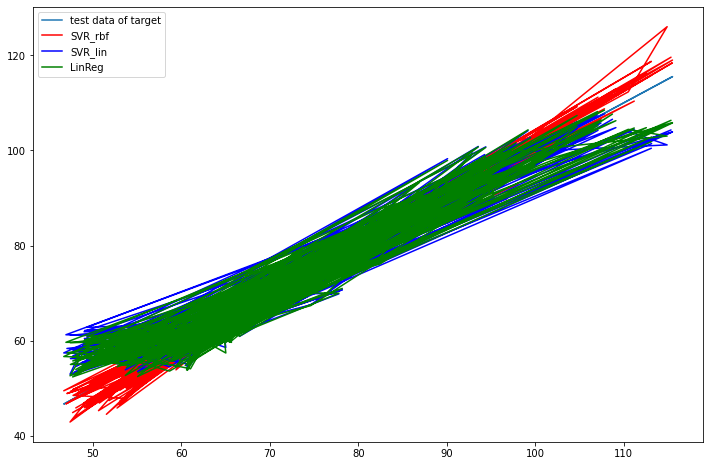

In [109]:
plt.plot(utest, utest)
plt.plot(utest, pred_SVR_rbf, 'red')
plt.plot(utest, pred_SVR_lin, 'blue')
plt.plot(utest, pred_linreg, 'green')
plt.legend(['test data of target','SVR_rbf','SVR_lin','LinReg'])
plt.show()

Test Residuals

In [110]:
SVResidual = utest - pred_SVR_rbf

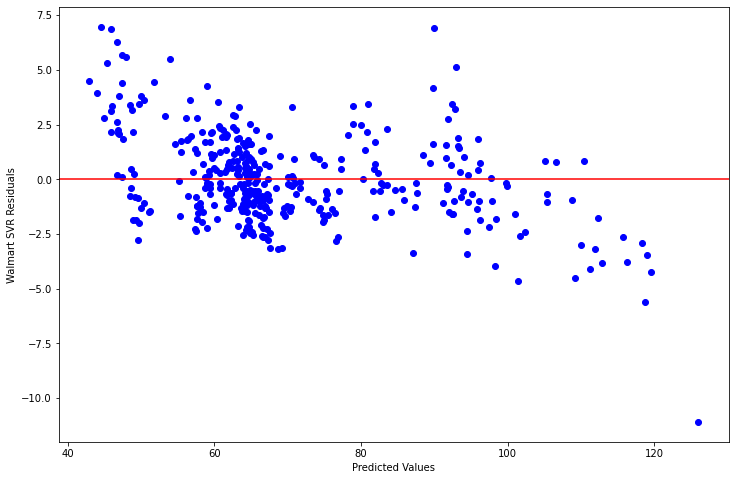

In [111]:
plt.scatter(pred_SVR_rbf, SVResidual, color = 'blue');
plt.axhline(0, color='red')
plt.xlabel('Predicted Values');
plt.ylabel('Walmart SVR Residuals');

Certainly better than Linear Regression models even at basic split .
We expect results to be even better with WFCV time series split of the data